In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint, EvalExponentialPdf, MakePoissonPmf, MakeMixture
import thinkplot

In [2]:
def EvalWeibullPdf(x, lam, k):
    """Computes the Weibull PDF.

    x: value
    lam: parameter lambda in events per unit time
    k: parameter

    returns: float probability density
    """
    arg = (x / lam)
    return k / lam * arg**(k-1) * np.exp(-arg**k)

def EvalWeibullCdf(x, lam, k):
    """Evaluates CDF of the Weibull distribution."""
    arg = (x / lam)
    return 1 - np.exp(-arg**k)

def MakeWeibullPmf(lam, k, high, n=200):
    """Makes a PMF discrete approx to a Weibull distribution.

    lam: parameter lambda in events per unit time
    k: parameter
    high: upper bound
    n: number of values in the Pmf

    returns: normalized Pmf
    """
    xs = np.linspace(0, high, n)
    ps = EvalWeibullPdf(xs, lam, k)
    return Pmf(dict(zip(xs, ps)))

In [3]:
class JobSearch(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """bg = before graduationduation
        ag = after graduation
        nj = no job
        """
        lam, k = hypo
        if lam == 0:
            return 0
        flag = data
        if flag == 'bg':
            like = EvalWeibullCdf(9, lam, k)
        elif flag == 'ag':
            like = EvalWeibullCdf(15, lam, k) - EvalWeibullCdf(9, lam, k)
        elif flag == 'nj':
            like = 1- EvalWeibullCdf(15, lam, k)
        elif flag == 'agoct':
            like = EvalWeibullCdf(13, lam, k) - EvalWeibullCdf(9, lam, k)
        elif flag == 'njoct':
            like = 1- EvalWeibullCdf(15, lam, k)
        else:
            raise ValueError('Invalid data')
        return like

In [5]:
data16 = []
for i in range(53):
    data16.append(('bg'))
for i in range(9):
    data16.append(('ag'))
for i in range(16):
    data16.append(('nj'))

In [6]:
data15 = []
for i in range(44):
    data15.append(('bg'))
for i in range(22):
    data15.append(('ag'))
for i in range(16):
    data15.append(('nj'))

In [7]:
data14 = []
for i in range(41):
    data14.append(('bg'))
for i in range(20):
    data14.append(('ag'))
for i in range(23):
    data14.append(('nj'))

In [8]:
data13 = []
for i in range(53):
    data13.append(('bg'))
for i in range(6):
    data13.append(('ag'))
for i in range(17):
    data13.append(('nj'))

In [9]:
data12 = []
for i in range(50):
    data12.append(('bg'))
for i in range(4):
    data12.append(('agoct'))
for i in range(15):
    data12.append(('njoct'))

In [10]:
dataAll = data16 + data15 + data14 + data13 + data12

In [11]:
from itertools import product

lams = np.linspace(0, 20, 101)
ks = np.linspace(0, 5, 101)

suiteAll = JobSearch(product(lams,ks))

In [12]:
suiteAll.UpdateSet(dataAll)

1.9152885047271964e-159

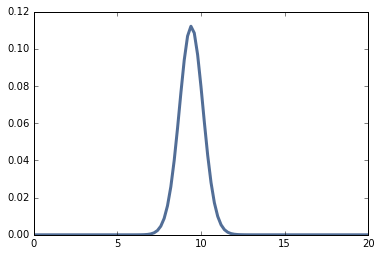

In [15]:
pmf_lamAll = suiteAll.Marginal(0)
thinkplot.Pdf(pmf_lamAll)
#pmf_lam.Mean()

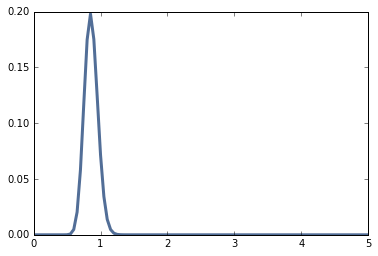

In [16]:
pmf_kAll = suiteAll.Marginal(1)
thinkplot.Pdf(pmf_kAll)

In [17]:
from thinkbayes2 import MakeBinomialPmf
n = 50
t_return = 20
metapmfAll = Pmf()
for (lam, k), prob in suiteAll.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmfAll[pmf] = prob

43

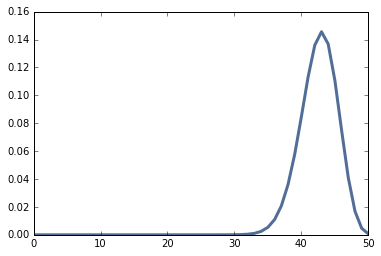

In [20]:
from thinkbayes2 import MakeMixture

mixAll = MakeMixture(metapmfAll)
thinkplot.Pdf(mixAll)
mixAll.MAP()